<a href="https://colab.research.google.com/github/park-hyunchun/DAP/blob/main/bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd


# Get pyupbit
Python Wrapper for Ubbit API

In [3]:
pip install pyupbit

# Bitcoin dataframe
using pyupbit, recieve on month KRW-Bitcoin data.

In [19]:
import pyupbit
pyupbit.get_tickers(fiat="KRW")
ticker = 'KRW-BTC'
interval = 'month'
to = '2021-11-30 11:30'
count = 30
pyupbit.get_ohlcv(ticker=ticker, interval=interval, to=to, count=count)

,open,high,low,close,volume,value
2019-06-01 09:00:00,10383000.0,16840000.0,9172000.0,13598000.0,395517.385698,4.981182e+12
2019-07-01 09:00:00,13599000.0,15537000.0,10880000.0,11957000.0,487170.940628,6.321462e+12
2019-08-01 09:00:00,11956000.0,14570000.0,11380000.0,11612000.0,283765.531371,3.661279e+12
2019-09-01 09:00:00,11612000.0,13014000.0,9268000.0,9945000.0,152291.291616,1.748379e+12
2019-10-01 09:00:00,9945000.0,11899000.0,8630000.0,10692000.0,158003.545596,1.604730e+12
2019-11-01 09:00:00,10698000.0,10996000.0,7683000.0,8838000.0,121988.838638,1.142572e+12
2019-12-01 09:00:00,8838000.0,8996000.0,7546000.0,8312000.0,88753.439498,7.496310e+11
2020-01-01 09:00:00,8308000.0,10882000.0,7910000.0,10781000.0,151081.461251,1.448010e+12
2020-02-01 09:00:00,10781000.0,12044000.0,10306000.0,10374000.0,141681.395126,1.608632e+12
2020-03-01 09:00:00,10380000.0,10980000.0,5489000.0,7799000.0,345309.781889,2.661304e+12


In [7]:
pip install -U finance-datareader

In [51]:
import FinanceDataReader as fdr

df_BTCUSD = fdr.DataReader('BTC/USD', '2019')
df_BTCUSD.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-01-01,3809.4,3709.5,3814.3,3664.4,469110.0,0.0269
2019-01-02,3873.8,3809.7,3894.8,3768.1,554470.0,0.0169
2019-01-03,3780.1,3874.1,3875.8,3753.0,450320.0,-0.0242
2019-01-04,3802.7,3780.5,3823.9,3720.0,488700.0,0.0060
2019-01-05,3785.4,3802.8,3846.7,3769.0,468450.0,-0.0046


In [27]:
df_BTCKRW = fdr.DataReader('BTC/KRW', '2019')
df_BTCKRW.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-01-01,4289000,4199000,4300000,4137000,3230.0,0.0214
2019-01-02,4345000,4294000,4360000,4244000,3860.0,0.0131
2019-01-03,4282000,4352000,4367000,4259000,15370.0,-0.0145
2019-01-04,4309000,4286000,4334000,4243000,19200.0,0.0063
2019-01-05,4297000,4309000,4354000,4278000,24870.0,-0.0028


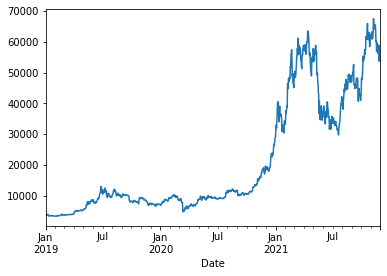

In [32]:
df_BTCUSD['Close'].plot()

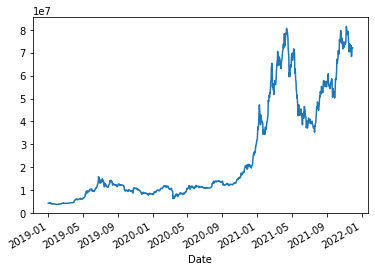

In [34]:
df_BTCKRW['Close'].plot()

In [75]:
USD_KRX = fdr.DataReader('USD/KRW', '2019')
idx = pd.date_range('01-01-2019', '11-24-2021')
USD_KRX.index = pd.DatetimeIndex(USD_KRX.index)
USD_KRX = USD_KRX.reindex(idx)
USD_KRX = USD_KRX.fillna(method='ffill')
USD_KRX.head()

,Close,Open,High,Low,Change
2019-01-01,1112.83,1114.30,1114.95,1112.69,-0.0013
2019-01-02,1120.12,1113.70,1122.91,1113.70,0.0066
2019-01-03,1125.89,1120.12,1131.05,1119.20,0.0052
2019-01-04,1116.85,1125.89,1128.92,1115.70,-0.0080
2019-01-05,1116.85,1125.89,1128.92,1115.70,-0.0080


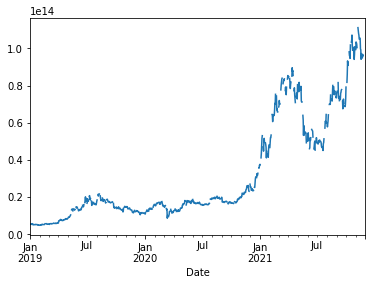

In [73]:
df_BTCUSD['Close'] = df_BTCUSD['Close'] * USD_KRX['Close']
df_BTCUSD['Close'].plot()